# Prepping the Model 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('/Users/belinda/Desktop/Internal-ProjectsUpdated-1/Datasets/merged_df.csv')
df

,month,town,flat_type,block_no,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,latitude,longitude,street_name,postal_code,nearest_mrt_station,nearest_mrt_distance_km,nearest_mall,nearest_mall_distance_km,min_dist_to_cbd,remaining_year
0,2017-01-01,ang mo kio,2 ROOM,406,11,44.0,Improved,1979-01-01,61 years 04 months,232000.0,...,1.362005,103.853880,ANG MO KIO AVENUE 10,560406,Ang Mo Kio,1.011433,AMK Hub,1.006211,8.237451,61
1,2017-01-01,ang mo kio,3 ROOM,108,2,67.0,New Generation,1978-01-01,60 years 07 months,250000.0,...,1.370966,103.838202,ANG MO KIO AVENUE 4,560108,Ang Mo Kio,1.270031,Broadway Plaza,0.867977,9.353331,60
2,2017-01-01,ang mo kio,3 ROOM,602,2,67.0,New Generation,1980-01-01,62 years 05 months,262000.0,...,1.380709,103.835368,ANG MO KIO AVENUE 5,560602,Yio Chu Kang,1.068607,Broadway Plaza,1.528020,10.474170,62
3,2017-01-01,ang mo kio,3 ROOM,465,5,68.0,New Generation,1980-01-01,62 years 01 month,265000.0,...,1.366201,103.857201,ANG MO KIO AVENUE 10,560465,Ang Mo Kio,0.947097,myVillage At Serangoon Garden,0.892903,8.721598,62
4,2017-01-01,ang mo kio,3 ROOM,601,2,67.0,New Generation,1980-01-01,62 years 05 months,265000.0,...,1.381041,103.835132,ANG MO KIO AVENUE 5,560601,Yio Chu Kang,1.091392,Broadway Plaza,1.571900,10.515177,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193871,2024-11-01,yishun,5 ROOM,235,8,135.0,Model A,1985-01-01,59 years 10 months,686000.0,...,1.434229,103.838544,YISHUN STREET 21,760235,Yishun,0.639369,Junction Nine,0.367665,16.331592,59
193872,2024-11-01,yishun,5 ROOM,335C,8,112.0,Improved,2015-01-01,90 years 01 month,700000.0,...,1.432488,103.844367,YISHUN STREET 31,763335,Yishun,1.082843,Junction Nine,0.309019,16.092666,90
193873,2024-11-01,yishun,5 ROOM,511B,11,113.0,Improved,2017-01-01,91 years 10 months,720000.0,...,1.415600,103.842414,YISHUN STREET 51,762511,Khatib,1.066478,Wisteria Mall,0.292344,14.231882,91
193874,2024-11-01,yishun,EXECUTIVE,405,5,148.0,Maisonette,1988-01-01,62 years 10 months,855500.0,...,1.426840,103.849274,YISHUN AVENUE 6,760405,Yishun,1.612668,Junction Nine,1.097326,15.446065,62


In [4]:
df.dtypes

month                        object
town                         object
flat_type                    object
block_no                     object
storey_range                  int64
floor_area_sqm              float64
flat_model                   object
lease_commence_date          object
remaining_lease              object
resale_price                float64
address                      object
latitude                    float64
longitude                   float64
street_name                  object
postal_code                  object
nearest_mrt_station          object
nearest_mrt_distance_km     float64
nearest_mall                 object
nearest_mall_distance_km    float64
min_dist_to_cbd             float64
remaining_year                int64
dtype: object

In [5]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block_no                    0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease             0
resale_price                0
address                     0
latitude                    0
longitude                   0
street_name                 0
postal_code                 0
nearest_mrt_station         0
nearest_mrt_distance_km     0
nearest_mall                0
nearest_mall_distance_km    0
min_dist_to_cbd             0
remaining_year              0
dtype: int64

In [6]:
# Renaming the columns

df = df.rename(columns={'min_dist_to_cbd': 'cbd_dist', 'nearest_mrt_distance_km': 'min_dist_mrt', 'nearest_mall': 'min_dist_shopping','remaining_year':'lease_remain_years', 'storey_range':'storey_median'})
df.head()


,month,town,flat_type,block_no,storey_median,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,latitude,longitude,street_name,postal_code,nearest_mrt_station,min_dist_mrt,min_dist_shopping,nearest_mall_distance_km,cbd_dist,lease_remain_years
0,2017-01-01,ang mo kio,2 ROOM,406,11,44.0,Improved,1979-01-01,61 years 04 months,232000.0,...,1.362005,103.853880,ANG MO KIO AVENUE 10,560406,Ang Mo Kio,1.011433,AMK Hub,1.006211,8.237451,61
1,2017-01-01,ang mo kio,3 ROOM,108,2,67.0,New Generation,1978-01-01,60 years 07 months,250000.0,...,1.370966,103.838202,ANG MO KIO AVENUE 4,560108,Ang Mo Kio,1.270031,Broadway Plaza,0.867977,9.353331,60
2,2017-01-01,ang mo kio,3 ROOM,602,2,67.0,New Generation,1980-01-01,62 years 05 months,262000.0,...,1.380709,103.835368,ANG MO KIO AVENUE 5,560602,Yio Chu Kang,1.068607,Broadway Plaza,1.528020,10.474170,62
3,2017-01-01,ang mo kio,3 ROOM,465,5,68.0,New Generation,1980-01-01,62 years 01 month,265000.0,...,1.366201,103.857201,ANG MO KIO AVENUE 10,560465,Ang Mo Kio,0.947097,myVillage At Serangoon Garden,0.892903,8.721598,62
4,2017-01-01,ang mo kio,3 ROOM,601,2,67.0,New Generation,1980-01-01,62 years 05 months,265000.0,...,1.381041,103.835132,ANG MO KIO AVENUE 5,560601,Yio Chu Kang,1.091392,Broadway Plaza,1.571900,10.515177,62


In [7]:
print(df.columns)


Index(['month', 'town', 'flat_type', 'block_no', 'storey_median',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'latitude', 'longitude',
       'street_name', 'postal_code', 'nearest_mrt_station', 'min_dist_mrt',
       'min_dist_shopping', 'nearest_mall_distance_km', 'cbd_dist',
       'lease_remain_years'],
      dtype='object')


# Handling Skewness in the Data


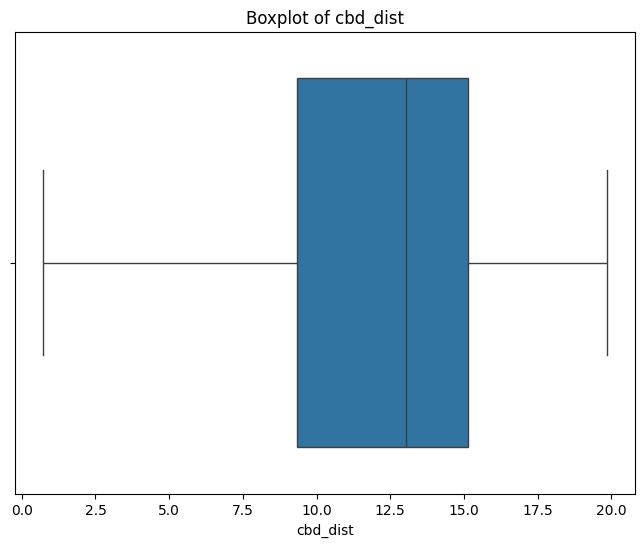

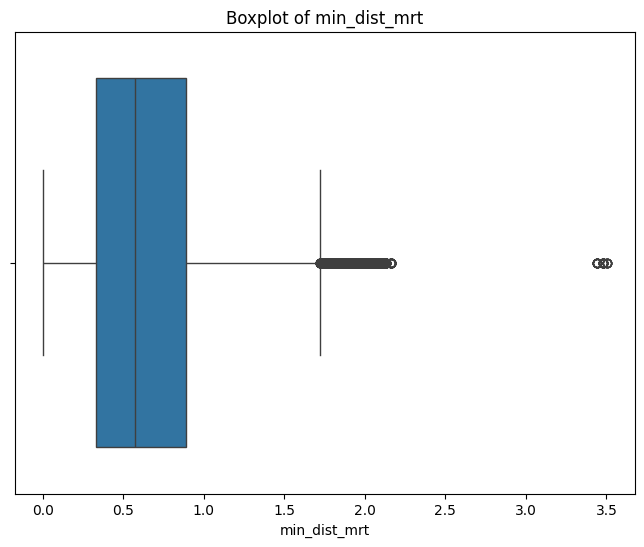

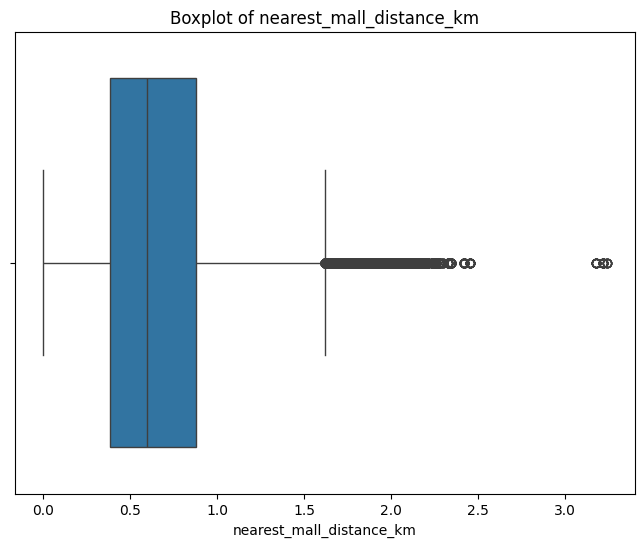

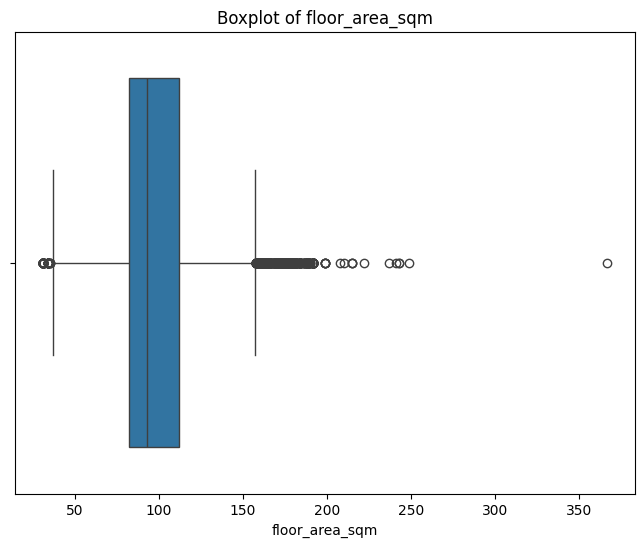

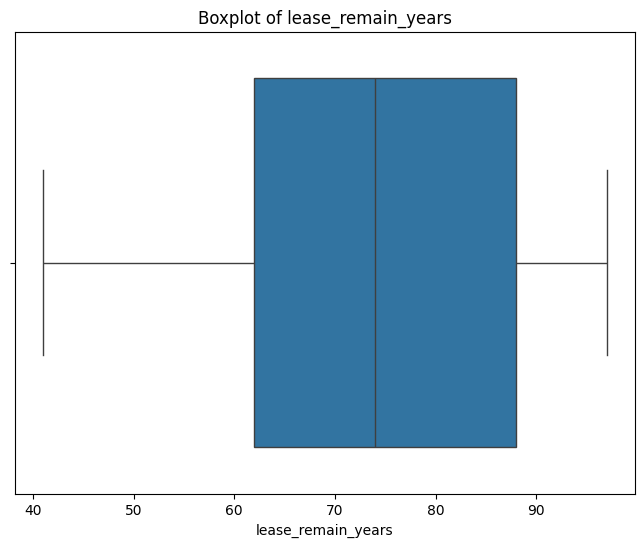

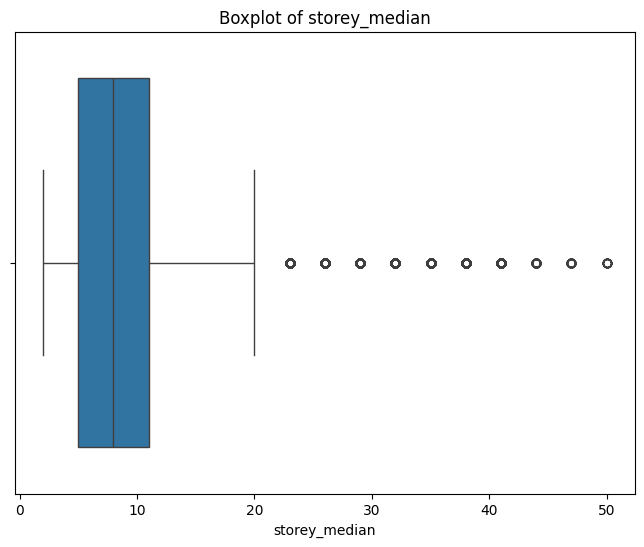

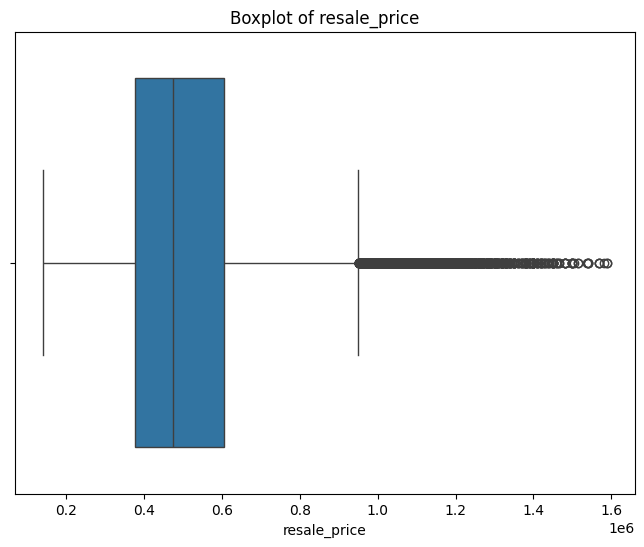

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','nearest_mall_distance_km','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [18]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price','nearest_mall_distance_km']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price,nearest_mall_distance_km
0,8.237451,1.011433,44.0,61,11,232000.0,1.006211
1,9.353331,1.270031,67.0,60,2,250000.0,0.867977
2,10.474170,1.068607,67.0,62,2,262000.0,1.528020
3,8.721598,0.947097,68.0,62,5,265000.0,0.892903
4,10.515177,1.091392,67.0,62,2,265000.0,1.571900
...,...,...,...,...,...,...,...
193871,16.331592,0.639369,135.0,59,8,686000.0,0.367665
193872,16.092666,1.082843,112.0,90,8,700000.0,0.309019
193873,14.231882,1.066478,113.0,91,11,720000.0,0.292344
193874,15.446065,1.612668,148.0,62,5,855500.0,1.097326


In [23]:
scope_df = scope_df.drop_duplicates()
df1 = scope_df

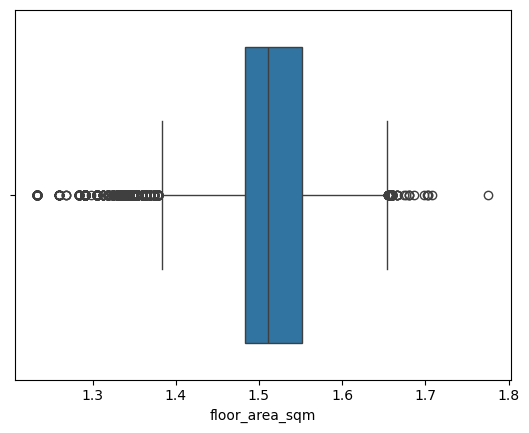

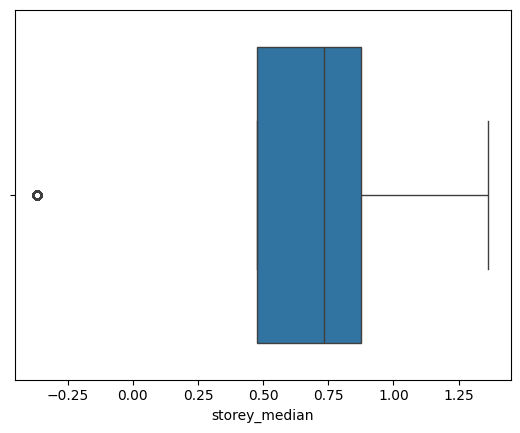

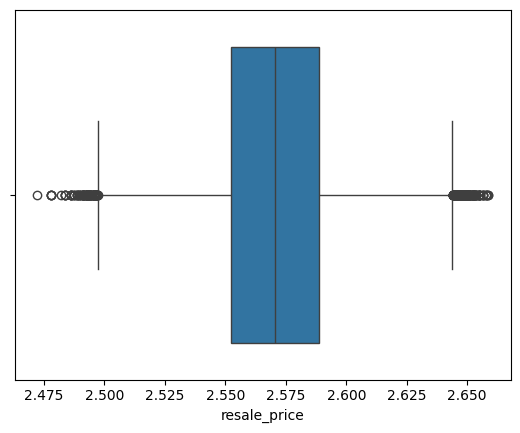

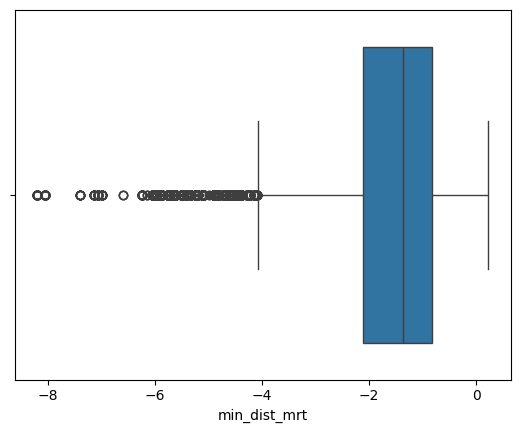

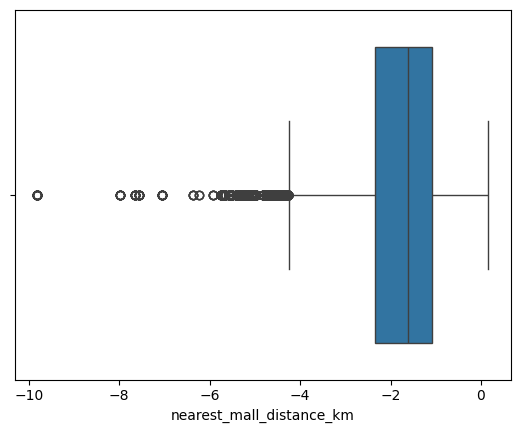

In [24]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

df1['min_dist_mrt'] = np.log(df1['min_dist_mrt'])
sns.boxplot(x='min_dist_mrt', data=df1)
plt.show()

df1['nearest_mall_distance_km'] = np.log(df1['nearest_mall_distance_km'])
sns.boxplot(x='nearest_mall_distance_km', data=df1)
plt.show()

# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

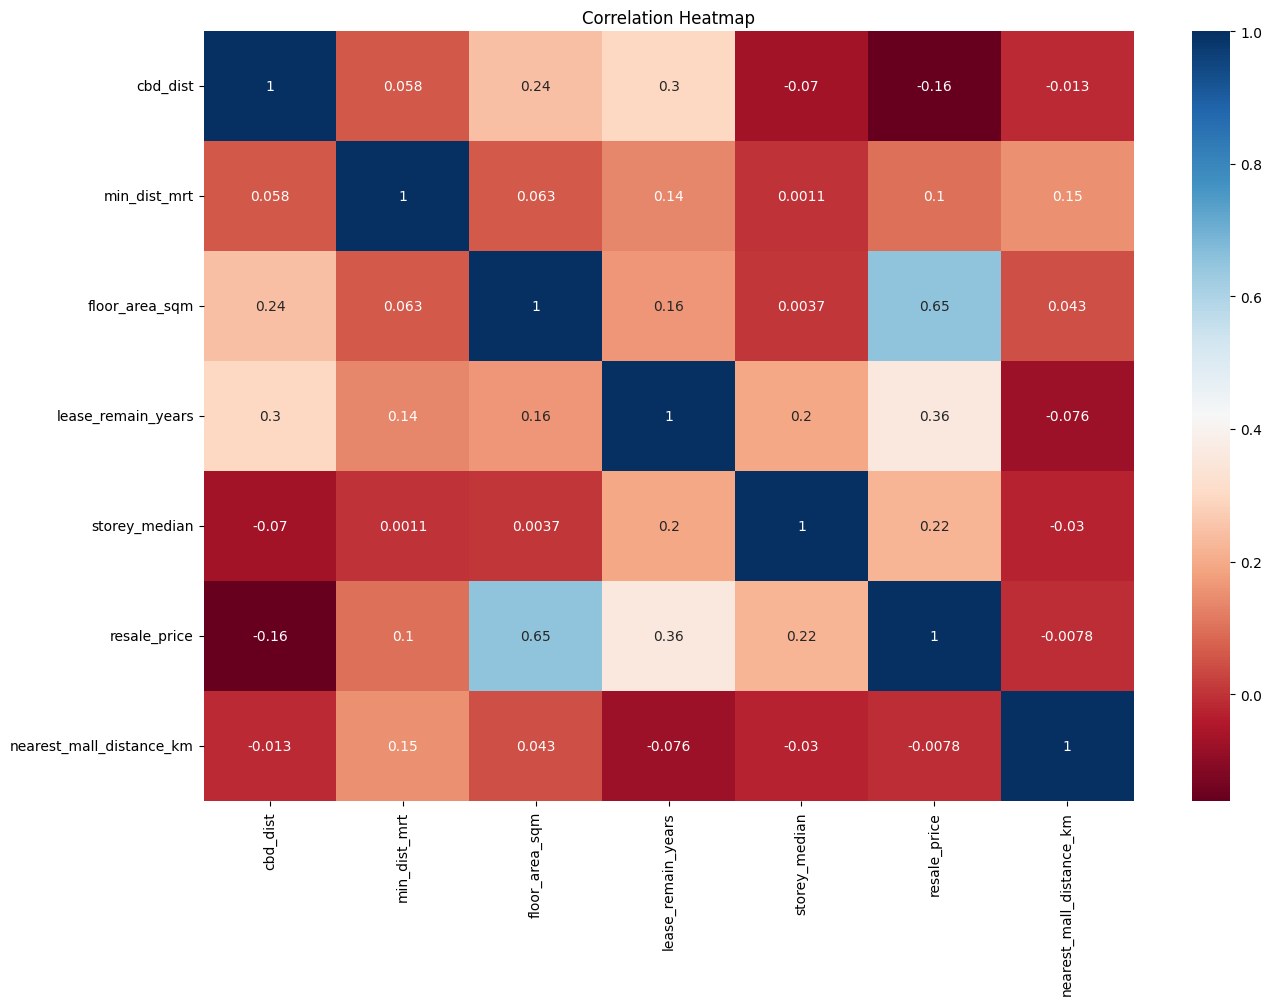

In [25]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)


# Encoding the data

In [26]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median', 'nearest_mall_distance_km']]
y=df1['resale_price']i

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

SyntaxError: invalid syntax (3572040148.py, line 4)

In [37]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.889000,0.807558,-2.944259,-0.927936,0.641251
1,-0.633044,1.410190,-1.314650,-0.999307,-1.724788
2,-0.375950,0.940795,-1.314650,-0.856565,-1.724788
3,-0.777948,0.657631,-1.257236,-0.856565,-0.453058
4,-0.366544,0.993893,-1.314650,-0.856565,-1.724788
...,...,...,...,...,...
192031,0.967602,-0.059493,1.400371,-1.070679,0.199266
192032,0.912798,0.973971,0.676544,1.141834,0.199266
192033,0.485979,0.935833,0.710992,1.213205,0.641251
192034,0.764484,2.208665,1.756664,-0.856565,-0.453058


# Splitting the Data for Training and Testing Purposes

In [38]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor 

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3}
 
Mean squared error: 0.011403428642748306
Mean Absolute Error 0.07507953481760293
Root Mean squared error: 0.10678683740399987
 
R-squared: 0.9021958392353852


# Testing Our Trained Model (Decision Tree Regressor)

In [40]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

np.float64(357421.32001323014)

## Test prediction 


In [ ]:
new_data = pd.DataFrame({'cbd_dist': [8.5], 'cbd_dist': [1], 'nearest_mall_distance_km': [1], 'floor_area_sqm': [62] , 'lease_remain_years' : [65], 'storey_median': [14], ''}) 
predicted_price = model.predict(new_data) 
print(f'Predicted Price: {predicted_price[0]}')

In [ ]:
['cbd_dist','min_dist_mrt','nearest_mall_distance_km','floor_area_sqm','lease_remain_years','storey_median','resale_price']